# AffectNet Exploration

## Imports

In [170]:
# disable INFO messages (e.g. from tensorflow)

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
print("Current Directory: {}".format(os.getcwd()))

Current Directory: /tf/notebooks/Notebooks


In [171]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [172]:
import pandas as pd
import numpy as np
import random
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Dataset Paths

In [173]:
# dataset paths

afnet_img = '../AffectNet/train_set/images'
afnet_anno = '../AffectNet/train_set/annotations'

## Dataset Classes

In [5]:
# emotion categories
# classes 8-10 are not facial expressions but classes of uncertainty of annotators
classes = {
    0:'neutral',
    1:'happiness',
    2:'sadness',
    3:'surprise',
    4:'fear',
    5:'disgust',
    6:'anger',
    7:'contempt',
    8:'none',
    9:'uncertain',
    10:'no-face'
}

## Random Image Plot

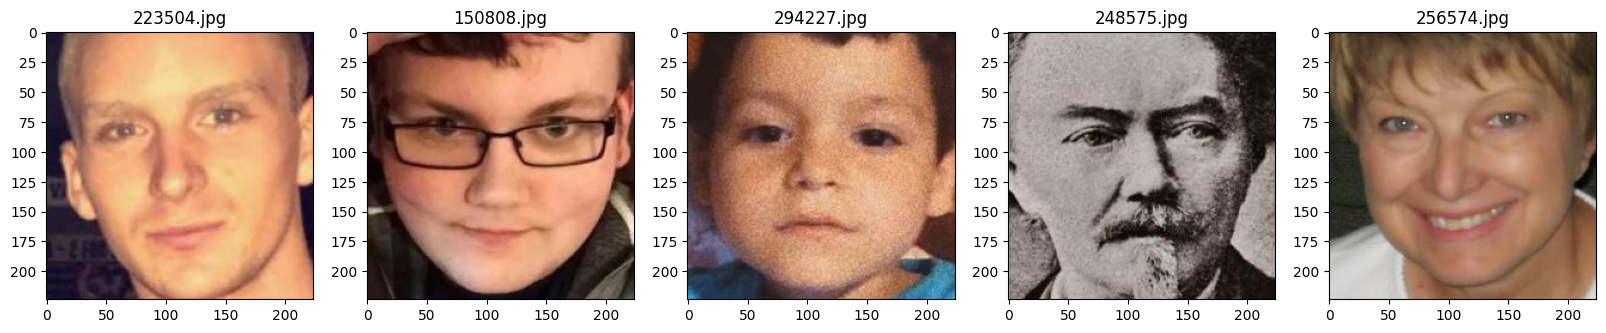

In [6]:
# select & plot random images

plt.figure(figsize=(20,20))

samples = 5
img_list = os.listdir(afnet_img) # list of all images in folder
img_list.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Extract numeric prefix without file extension
img_files = [random.choice(img_list) for i in range(samples)] # random samples
img_indices = [img_list.index(img) for img in img_files] # indices 

for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text(img_file)
    plt.imshow(img)

## Plotting Corresponding Annotations

In [7]:
print('Image indices:\t', img_indices) # print indices
print('Image files:\t', [img_list[index] for index in img_indices]) # test if indices correspond to images shown above

Image indices:	 [154659, 104400, 203706, 172056, 177581]
Image files:	 ['223504.jpg', '150808.jpg', '294227.jpg', '248575.jpg', '256574.jpg']


In [8]:
# load file list of annotations
anno_list = os.listdir(afnet_anno)
# sort list by file name (ascending)
anno_list.sort(key=lambda x: int(x.split('_')[0])) # Assumes the numeric prefix is followed by an underscore
# collect corresponding file names of annotations
anno_files = [[anno_list[img_indices[i]*4+j] for j in range(0,4)] for i in range(0,len(img_indices))]
anno_files

[['223504_aro.npy', '223504_exp.npy', '223504_lnd.npy', '223504_val.npy'],
 ['150808_aro.npy', '150808_exp.npy', '150808_lnd.npy', '150808_val.npy'],
 ['294227_aro.npy', '294227_exp.npy', '294227_lnd.npy', '294227_val.npy'],
 ['248575_aro.npy', '248575_exp.npy', '248575_lnd.npy', '248575_val.npy'],
 ['256574_aro.npy', '256574_exp.npy', '256574_lnd.npy', '256574_val.npy']]

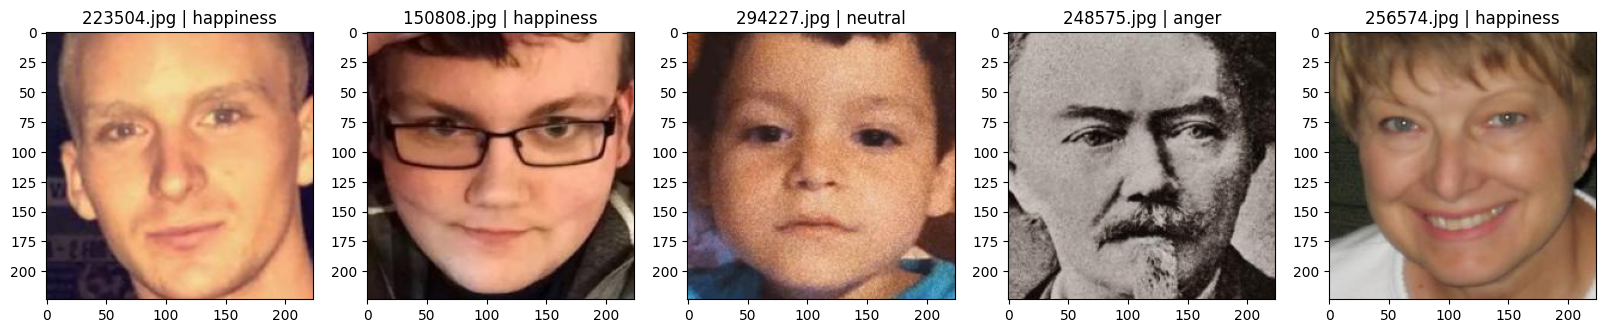

In [9]:
# Plot images again with corresponding classes
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    anno_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    exp_class = int(np.load(anno_file_path))
    expression = classes[exp_class]
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    plt.imshow(img)

In [10]:
# show annotation infos
for img_file in img_files:
    for i in range(4):
        file = anno_files[img_files.index(img_file)][i]
        anno_file_path = os.path.join(afnet_anno, file)
        data = np.load(anno_file_path)
        print('Info from {}:\n'.format(file), data)
        if i == 2:
            print('\t\tLandmark count: {}'.format(len(data)//2)) # landmarks given by (x,y), so divide by 2
        print()

Info from 223504_aro.npy:
 -0.0842815

Info from 223504_exp.npy:
 1

Info from 223504_lnd.npy:
 [ 20.98133333  97.79650704  27.85745455 122.03267606  37.03466667
 144.79233803  45.41769697 167.33746479  57.31684848 187.56056338
  70.90618182 204.16180282  90.80145455 217.81633803 110.92751515
 229.29397183 134.31175758 229.48326761 156.54206061 221.21735211
 176.17260606 205.03256338 195.18545455 187.01160563 210.53963636
 164.32766197 219.51321212 140.57735211 221.14909091 113.11053521
 219.62181818  87.33476056 218.7529697   61.67256338  25.56993939
  80.99335211  30.38933333  68.15278873  44.98327273  60.47369014
  62.12266667  58.06332394  79.03806061  59.65971831 115.56363636
  51.52630986 134.78690909  45.51932394 153.04630303  42.58523944
 172.55466667  43.29194366 188.08533333  51.36856338 101.01042424
  76.77205634 103.264       93.49949296 105.1849697  109.98084507
 107.24848485 127.49070423  94.08678788 138.71594366 102.25939394
 141.31560563 111.61309091 142.28101408 121.40

## Plot Facial Landmarks

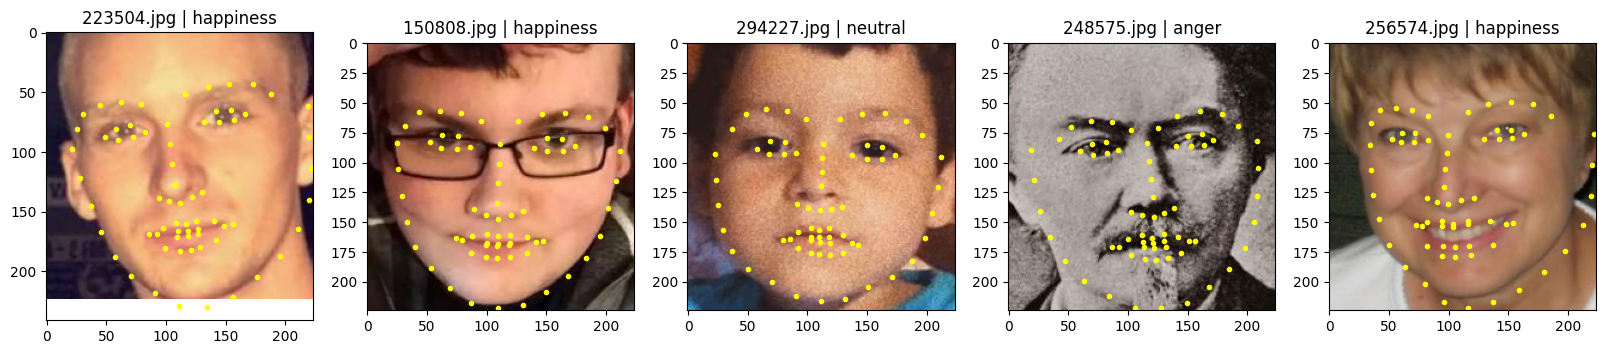

In [11]:
# Plot images again with corresponding classes and landmarks
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    exp_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    exp_class = int(np.load(exp_file_path))
    expression = classes[exp_class]
    
    facial_landmarks = np.load(os.path.join(afnet_anno, anno_files[img_files.index(img_file)][2])) # index 2 is _lnd.npy
    # Convert the landmarks to a 2D array with shape (68, 2)
    facial_landmarks = facial_landmarks.reshape((68, 2))
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    
    plt.imshow(img)
    plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='yellow', marker='.')

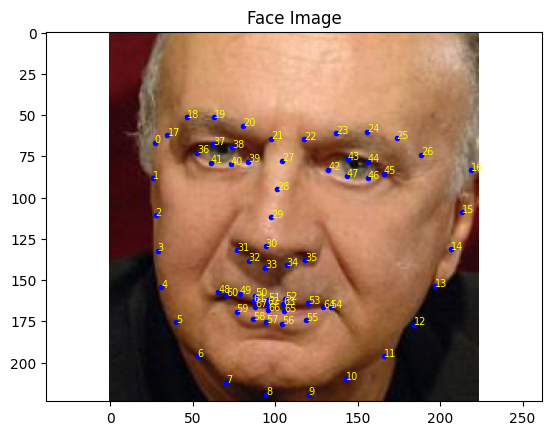

In [12]:
# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a separate plot for facial landmarks
#plt.figure()
#plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='red', marker='.')
#plt.title('Facial Landmarks')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.gca().invert_yaxis()
#plt.axis('equal')

# Create a plot with the face image
plt.figure()
plt.imshow(face_image)
plt.title('Face Image')
plt.axis('equal')

# Overlay the facial landmarks on the face image
plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    plt.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Display the plots
plt.show()

## Plot Occlusion Rectangle

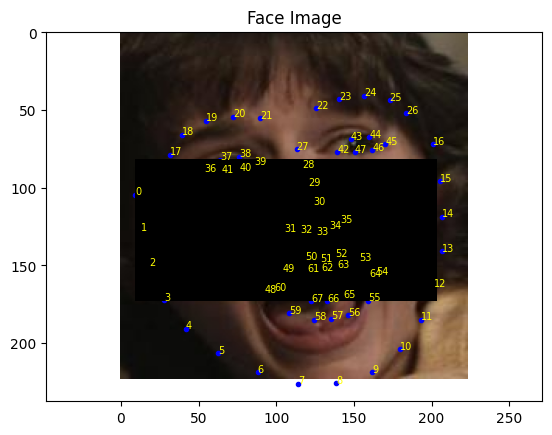

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '152225_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '152225.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
ax.set_title('Face Image')
ax.axis('equal')

# Overlay the facial landmarks on the face image
ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the dimensions for the rectangle
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])
height = width / (224 / 105)

# Calculate the coordinates for the rectangle corners
A = facial_landmarks[0]
D = facial_landmarks[16]
AB = facial_landmarks[0] + (facial_landmarks[16] - facial_landmarks[0]) / 2
B = AB - (facial_landmarks[36] - facial_landmarks[45]) * height / (2 * np.linalg.norm(facial_landmarks[36] - facial_landmarks[45]))
C = AB + (facial_landmarks[36] - facial_landmarks[45]) * height / (2 * np.linalg.norm(facial_landmarks[36] - facial_landmarks[45]))
CD = AB

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], B[1]), width, height, facecolor='black')
ax.add_patch(rect)

# Display the plot
plt.show()


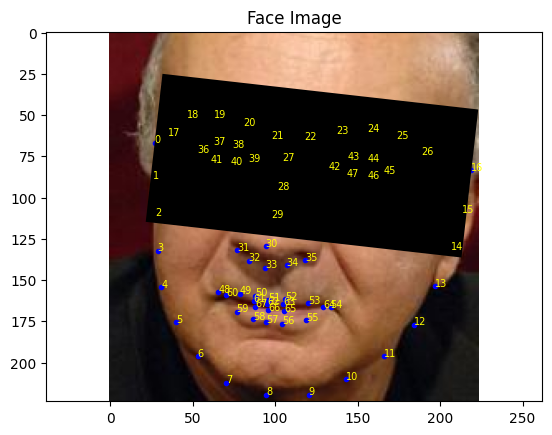

In [16]:
'''
Occlude Face by placing occlusion exactly between the temporal bones moving it on a straight between the eyes using the same rotation. 
Temporal bones define the width of the occlusion.
'''

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
ax.set_title('Face Image')
ax.axis('equal')

# Overlay the facial landmarks on the face image
ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the distance between facial landmark 0 and facial landmark 16
# norm = vector length, euclidean distance = distance
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])

# meta quest 2 aspect ratio (width/height)
aspect_ratio = 224/105

# Calculate the height of the rectangle
height = width / (aspect_ratio)

# Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
eye_center = fab, a
# Calculate the center point between facial landmark 0 and facial landmark 16 (temporal bones)
temporal_bone_center = facial_landmarks[0] + (facial_landmarks[16] - facial_landmarks[0]) / 2

# Translate eye_center to be exactly between temporal bones
# calc vector v
v = temporal_bone_center - eye_center
# calc direction of straight line
direction_straight = facial_landmarks[45] - facial_landmarks[36]
# norm (lenght) of v
norm_v = np.linalg.norm(v)
# project vector v in direction of straight line of eye_center
projection = np.dot(v, direction_straight) / np.dot(direction_straight, direction_straight) * direction_straight
# translate eye_center by vector projection
center = eye_center + projection


# Calculate the angle between facial landmark 36 and facial landmark 45
oppocite_length = facial_landmarks[45, 1] - facial_landmarks[36, 1] # Gegenkathete, y-axis
adjacent_length = facial_landmarks[45, 0] - facial_landmarks[36, 0] # Ankathete, x-axis
angle = np.arctan2(oppocite_length, adjacent_length)

# Calculate the corner points of the rectangle
#A = horizontal_center - width / 2 * np.array([np.cos(angle), np.sin(angle)])
A = center - width / 2 * np.array([np.cos(angle), np.sin(angle)]) - height / 2 * np.array([-np.sin(angle), np.cos(angle)])

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], A[1]), width, height, angle=np.degrees(angle), facecolor='black')
ax.add_patch(rect)

# Display the plot
plt.show()

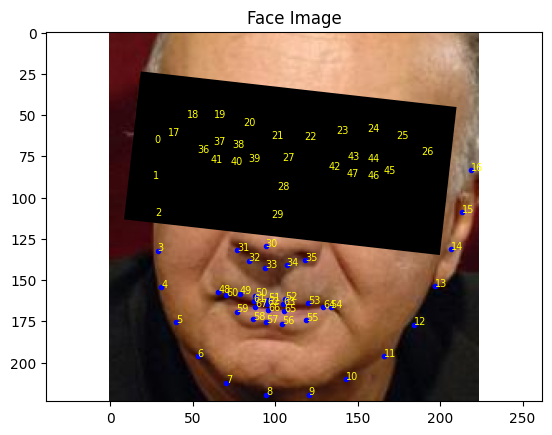

In [282]:
'''
Occlude Face by placing occlusion exactly between between the eyes using the same rotation.
Temporal bones define the width of the occlusion.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
ax.set_title('Face Image') 
ax.axis('equal')

# Overlay the facial landmarks on the face image
ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the distance between facial landmark 0 and facial landmark 16
# norm = vector length, euclidean distance = distance
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])

# meta quest 2 aspect ratio (width/height)
aspect_ratio = 224/105

# Calculate the height of the rectangle
height = width / (aspect_ratio)

# Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
eye_center = facial_landmarks[36] + (facial_landmarks[45] - facial_landmarks[36]) / 2

# Calculate the angle between facial landmark 36 and facial landmark 45
oppocite_length = facial_landmarks[45, 1] - facial_landmarks[36, 1] # Gegenkathete, y-axis
adjacent_length = facial_landmarks[45, 0] - facial_landmarks[36, 0] # Ankathete, x-axis
angle = np.arctan2(oppocite_length, adjacent_length)

# Calculate the corner point of the rectangle
A = eye_center - width / 2 * np.array([np.cos(angle), np.sin(angle)]) - height / 2 * np.array([-np.sin(angle), np.cos(angle)])

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], A[1]), width, height, angle=np.degrees(angle), facecolor='black')
ax.add_patch(rect)

# Display the plot
plt.show()

### Final Occlusion Rectangle Calculation
#### Without Facial Landmarks and Plot Annotations

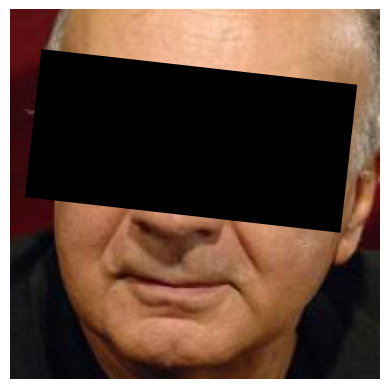

In [307]:
'''
Occlude Face by placing occlusion exactly between between the eyes using the same rotation.
Temporal bones define the width of the occlusion.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
#ax.set_title('Face Image')
ax.set_frame_on(False)
ax.axis('off')

# Overlay the facial landmarks on the face image
#ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
#for i, landmark in enumerate(facial_landmarks):
#    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the distance between facial landmark 0 and facial landmark 16
# norm = vector length, euclidean distance = distance
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])

# meta quest 2 aspect ratio (width/height)
aspect_ratio = 224/105

# Calculate the height of the rectangle
height = width / (aspect_ratio)

# Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
eye_center = facial_landmarks[36] + (facial_landmarks[45] - facial_landmarks[36]) / 2

# Calculate the angle between facial landmark 36 and facial landmark 45
oppocite_length = facial_landmarks[45, 1] - facial_landmarks[36, 1] # Gegenkathete, y-axis
adjacent_length = facial_landmarks[45, 0] - facial_landmarks[36, 0] # Ankathete, x-axis
angle = np.arctan2(oppocite_length, adjacent_length)

# Calculate the corner point of the rectangle
A = eye_center - width / 2 * np.array([np.cos(angle), np.sin(angle)]) - height / 2 * np.array([-np.sin(angle), np.cos(angle)])

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], A[1]), width, height, angle=np.degrees(angle), facecolor='black')
ax.add_patch(rect)

# Save File
#plt.savefig('output.jpg', format='jpg', dpi=fig.dpi)

# Display the plot
plt.show()

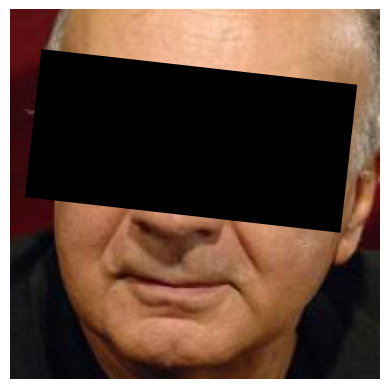

In [310]:
# Same code, but simplified

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
l = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
l = l.reshape((68, 2))

# Load the corresponding face image
img = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_frame_on(False)
ax.axis('off')

# Calculate the distance between facial landmark 0 and facial landmark 16
# norm = vector length, euclidean distance = distance
w = np.linalg.norm(l[0] - l[16])

# meta quest 2 aspect ratio (width/height)
ar = 224/105

# Calculate the height of the rectangle
h = w / (ar)

# Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
m_ocd = l[36] + (l[45] - l[36]) / 2

# Calculate the angle between facial landmark 36 and facial landmark 45
a = l[45, 0] - l[36, 0] # Ankathete, x-axis
b = l[45, 1] - l[36, 1] # Gegenkathete, y-axis
alpha = np.arctan2(b, a)

# Calculate the corner point of the rectangle
R_a = m_ocd - w / 2 * np.array([np.cos(alpha), np.sin(alpha)]) - h / 2 * np.array([-np.sin(alpha), np.cos(alpha)])

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((R_a[0], R_a[1]), w, h, angle=np.degrees(alpha), facecolor='black')
ax.add_patch(rect)

# Save File
#plt.savefig('output.jpg', format='jpg', dpi=fig.dpi)

# Display the plot
plt.show()

### Final Calculation creating correct output

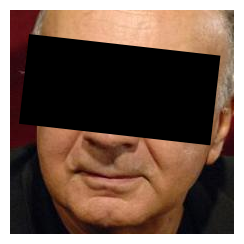

In [315]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
l = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
l = l.reshape((68, 2))

# Load the corresponding face image
img = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Get the original image dimensions
original_height, original_width, _ = img.shape

# Create a figure with the same dimensions as the original image
fig = plt.figure(figsize=(original_width / 100, original_height / 100), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

ax.imshow(img)
ax.set_frame_on(False)
ax.axis('off')

# Calculate the distance between facial landmark 0 and facial landmark 16
# norm = vector length, euclidean distance = distance
w = np.linalg.norm(l[0] - l[16])

# meta quest 2 aspect ratio (width/height)
ar = 224/105

# Calculate the height of the rectangle
h = w / (ar)

# Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
m_ocd = l[36] + (l[45] - l[36]) / 2

# Calculate the angle between facial landmark 36 and facial landmark 45
a = l[45, 0] - l[36, 0] # Ankathete, x-axis
b = l[45, 1] - l[36, 1] # Gegenkathete, y-axis
alpha = np.arctan2(b, a)

# Calculate the corner point of the rectangle
R_a = m_ocd - w / 2 * np.array([np.cos(alpha), np.sin(alpha)]) - h / 2 * np.array([-np.sin(alpha), np.cos(alpha)])

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((R_a[0], R_a[1]), w, h, angle=np.degrees(alpha), facecolor='black')
ax.add_patch(rect)

# Save File
plt.savefig('output.jpg', format='jpg', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()

### Vector Plots for Visualizing Center Translation

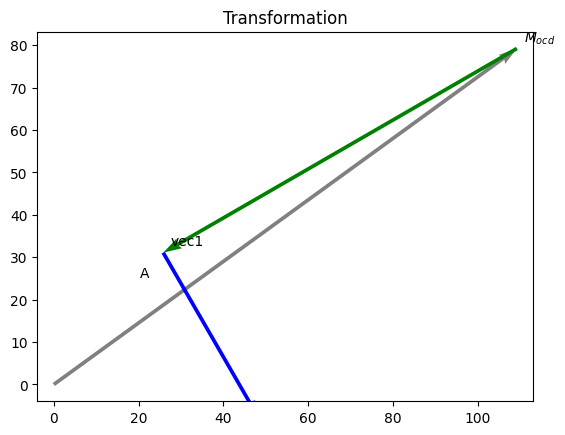

In [298]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the vectors
eye_center_vec = eye_center
vec1 = -width / 2 * np.array([np.cos(angle), np.sin(angle)])
vec2 = -height / 2 * np.array([-np.sin(angle), np.cos(angle)])

# Calculate the intermediate points
vec_m_ocd = eye_center
vec1_to_vec2 = eye_to_vec1 + vec1
vec2_to_A = vec1_to_vec2 + vec2

# Create a new plot for the transformation
fig, ax = plt.subplots()
ax.set_title('Transformation')
ax.axis('equal')

# Plot the vectors and transformation steps
origin = np.zeros_like(eye_center)

ax.quiver(origin[0], origin[1], vec_m_ocd[0], vec_m_ocd[1], color='grey', angles='xy', scale_units='xy', scale=1, label='eye_center')
ax.quiver(eye_center_vec[0], eye_center_vec[1], vec1[0], vec1[1], color='green', angles='xy', scale_units='xy', scale=1, label='width / 2 * np.array([np.cos(angle), np.sin(angle)])')
ax.quiver(vec1_to_vec2[0], vec1_to_vec2[1], vec2[0], vec2[1], color='blue', angles='xy', scale_units='xy', scale=1, label='height / 2 * np.array([-np.sin(angle), np.cos(angle)])')

ax.annotate(r'$M_{ocd}$', (eye_center_vec[0], eye_center_vec[1]), xytext=(5, 5), textcoords='offset points')
ax.annotate('vec1', (vec1_to_vec2[0], vec1_to_vec2[1]), xytext=(5, 5), textcoords='offset points')
ax.annotate('vec2', (vec2_to_A[0], vec2_to_A[1]), xytext=(5, 5), textcoords='offset points')
ax.annotate('A', (A[0], A[1]), xytext=(5, 5), textcoords='offset points')

# Display the plot
#plt.legend()
plt.show()


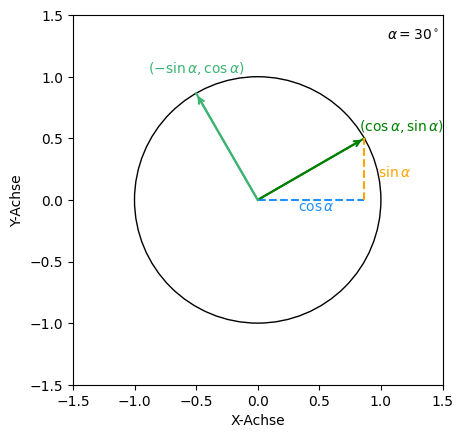

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = r'D:\Cloud\Google Drive\Meine Ablage\_Facial-Expression-Recognition\LaTeX\Fonts\libertinus\LibertinusSerif-Regular.otf'
#font_prop = fm.FontProperties(fname=font_path)
#if font_prop.get_name() != 'LibertinusSerif-Regular':
#    raise ValueError('Die Schriftart wurde nicht gefunden oder konnte nicht geladen werden.')


angle = 30/180*np.pi#np.pi/4  # Example angle of 45 degrees (radians)

# Coordinates
x1 = np.cos(angle)
y1 = np.sin(angle)

x2 = -np.sin(angle)
y2 = np.cos(angle)

# Plot unit circle
fig, ax = plt.subplots()
unit_circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none')
ax.add_artist(unit_circle)

# Plot cos, sin, (cos, sin)
ax.plot([0, x1], [0, y1], '-', label='', color='green')
ax.plot([0, x1], [0, 0], '--', label='cos', color='dodgerblue')
ax.plot([x1, x1], [0, y1], '--', label='sin', color='orange')

ax.annotate('', xy=(x1, y1), xytext=(0, 0), arrowprops={'arrowstyle': '->', 'linewidth': 1.5, 'color': 'green'})
ax.annotate('', (x1/2, y1/2), xytext=(10, 10), textcoords='offset points')
label = r'$(\cos\alpha, \sin\alpha)$'
ax.text(x1+0.3, y1+0.1, label, rotation=0, verticalalignment='center', horizontalalignment='center', color='green')
ax.annotate(r'$\cos\alpha$', (x1/4, -0.2), xytext=(10, 10), textcoords='offset points', color='dodgerblue')
ax.annotate(r'$\sin\alpha$', (x1, y1-0.42), xytext=(10, 10), textcoords='offset points', color='orange')

# Plot -sin, cos, (-sin, cos)

ax.plot([0, x2], [0, y2], '-', label='', color='mediumseagreen')

ax.annotate('', xy=(x2, y2), xytext=(0, 0), arrowprops={'arrowstyle': '->', 'linewidth': 1.5, 'color': 'mediumseagreen'})
ax.annotate('', (x2/2, y2/2), xytext=(10, 10), textcoords='offset points')
label = r'$(-\sin\alpha, \cos\alpha)$'
ax.text(x2, y2+0.2, label, rotation=0, verticalalignment='center', horizontalalignment='center', color='mediumseagreen')

# Show alpha definition
ax.annotate(r'$\alpha = 30^\circ$', (1.05, 1.3), xytext=(0, 0), textcoords='offset points')

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_aspect('equal')
ax.set_xlabel('X-Achse')
ax.set_ylabel('Y-Achse')
#ax.set_title('Ortsvektoren mit Kosinus & Sinus im Einheitskreis', fontfamily='serif', fontsize=11)

#ax.legend()

# Export Plot
plt.savefig('sin-cos-vec.pdf', format='pdf')

# Show the plot
plt.show()



## Occlusion Pipeline Test for multiple Images

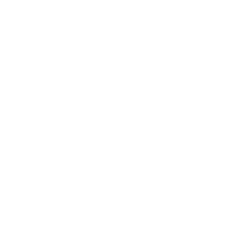

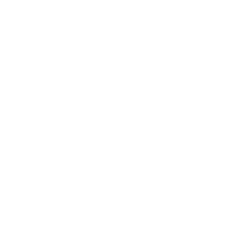

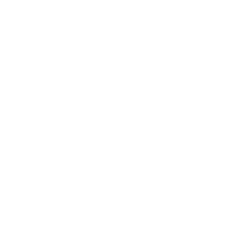

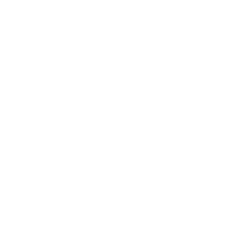

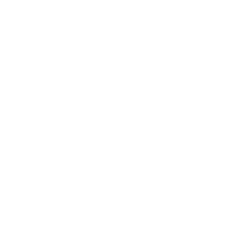

In [322]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# dataset paths
afnet_img = '../AffectNet/train_set/images'
afnet_anno = '../AffectNet/train_set/annotations'

output_path = ''

img_list = os.listdir(afnet_img) # list of all images in folder
img_list.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Extract numeric prefix without file extension (int only)

#for img_file in img_list:
for i in range(5):
    filename = str(int(os.path.splitext(img_list[i])[0]))

    # Load the facial landmarks from the npy file
    l = np.load(os.path.join(afnet_anno, filename + '_lnd.npy'))

    # Convert the landmarks to a 2D array with shape (68, 2)
    l = l.reshape((68, 2))

    # Load the corresponding face image
    img = mpimg.imread(os.path.join(afnet_img, img_list[i]))

    # Get the original image dimensions
    original_height, original_width, _ = img.shape

    # Create a figure with the same dimensions as the original image
    fig = plt.figure(figsize=(original_width / 100, original_height / 100), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1])

    #ax.imshow(img)
    ax.set_frame_on(False)
    ax.axis('off')

    # Calculate the distance between facial landmark 0 and facial landmark 16
    # norm = vector length, euclidean distance = distance
    w = np.linalg.norm(l[0] - l[16])

    # meta quest 2 aspect ratio (width/height)
    ar = 224/105

    # Calculate the height of the rectangle
    h = w / (ar)

    # Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
    m_ocd = l[36] + (l[45] - l[36]) / 2

    # Calculate the angle between facial landmark 36 and facial landmark 45
    a = l[45, 0] - l[36, 0] # Ankathete, x-axis
    b = l[45, 1] - l[36, 1] # Gegenkathete, y-axis
    alpha = np.arctan2(b, a)

    # Calculate the corner point of the rectangle
    R_a = m_ocd - w / 2 * np.array([np.cos(alpha), np.sin(alpha)]) - h / 2 * np.array([-np.sin(alpha), np.cos(alpha)])

    # Create and add the rectangle patch to the plot
    rect = patches.Rectangle((R_a[0], R_a[1]), w, h, angle=np.degrees(alpha), facecolor='black')
    ax.add_patch(rect)

    # Save File
    plt.savefig(filename + '_occ.jpg', format='jpg', bbox_inches='tight', pad_inches=0)

    # Display the plot
    #plt.show()